In [1]:
%matplotlib notebook
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import colors 
from matplotlib.ticker import PercentFormatter 
import seaborn as sns

In [2]:
%%time
df = pd.read_parquet("microdados_enem_2016_reduced.parquet", engine="fastparquet")

CPU times: total: 1.83 s
Wall time: 4.2 s


In [3]:
#df = df[["CO_ESCOLA", "IN_TREINEIRO", "NU_IDADE", "NU_NOTA_CH", "NU_NOTA_CN", "NU_NOTA_LC", "NU_NOTA_MT", "NU_NOTA_REDACAO", "Q001", "Q002", "Q046", "SG_UF_RESIDENCIA", "TP_ANO_CONCLUIU", "TP_COR_RACA", "TP_DEPENDENCIA_ADM_ESC", "TP_ENSINO", "TP_ESCOLA", "TP_SEXO", "TP_ST_CONCLUSAO"]]

In [4]:
#df.to_parquet("microdados_enem_2016_reduced.parquet", compression=None)

In [5]:
df.head()

,CO_ESCOLA,IN_TREINEIRO,NU_IDADE,NU_NOTA_CH,NU_NOTA_CN,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Q001,Q002,Q046,SG_UF_RESIDENCIA,TP_ANO_CONCLUIU,TP_COR_RACA,TP_DEPENDENCIA_ADM_ESC,TP_ENSINO,TP_ESCOLA,TP_SEXO,TP_ST_CONCLUSAO
0,None,0,23,629.400024,550.000000,574.000000,462.899994,580.0,E,E,A,PB,7,3,<NA>,<NA>,1,M,1
1,None,0,20,669.799988,576.599976,610.099976,423.600006,560.0,H,H,A,PR,3,1,<NA>,<NA>,1,M,1
2,None,0,21,576.900024,485.799988,637.400024,414.600006,480.0,B,E,A,BA,1,3,<NA>,<NA>,1,M,1
3,None,0,17,628.599976,571.400024,646.200012,709.400024,620.0,E,E,A,PA,1,1,<NA>,<NA>,1,M,1
4,None,0,36,NaN,NaN,NaN,NaN,NaN,A,A,A,DF,10,1,<NA>,<NA>,1,F,1


In [6]:
v_total = len(df)
print("Quantidade de registros sem filtro: ", v_total)

Quantidade de registros sem filtro:  8627367


In [7]:
df['TP_SEXO'].value_counts()

TP_SEXO
F    4982639
M    3644728
Name: count, dtype: int64

In [8]:
#Sem valor nulo na coluna
df.drop(df.loc[df['TP_SEXO'].isnull()].index, inplace=True)
v_f1 = v_total
print("Quantidade de registros após F1: ", v_f1)

Quantidade de registros após F1:  8627367


In [9]:
df['TP_ST_CONCLUSAO'].value_counts()

TP_ST_CONCLUSAO
1    4928251
2    1882278
3    1344085
4     472753
Name: count, dtype: Int64

In [10]:
%%time
df.drop(df.loc[df['TP_ST_CONCLUSAO']==3].index, inplace=True)
df.drop(df.loc[df['TP_ST_CONCLUSAO']==4].index, inplace=True)
v_f2 = len(df)
print("Quantidade de registros após F2: ", v_f2)

Quantidade de registros após F2:  6810529
CPU times: total: 2.83 s
Wall time: 6.04 s


In [11]:
df['TP_ANO_CONCLUIU'].value_counts().sort_index()

TP_ANO_CONCLUIU
0     1882278
1      966842
2      699987
3      527310
4      416454
5      317364
6      294214
7      244461
8      199619
9      178091
10    1083909
Name: count, dtype: Int64

In [12]:
%%time
#df.drop(df.loc[df['TP_ANO_CONCLUIU']==0].index, inplace=True)
df.drop(df.loc[df['TP_ANO_CONCLUIU']==10].index, inplace=True)
v_f3 = len(df)
print("Quantidade de registros após F3: ", v_f3)

Quantidade de registros após F3:  5726620
CPU times: total: 1.16 s
Wall time: 1.8 s


In [13]:
df['TP_ESCOLA'].value_counts()

TP_ESCOLA
1    3844344
2    1561876
3     319415
4        985
Name: count, dtype: Int64

In [14]:
%%time
df.drop(df.loc[df['TP_ESCOLA']==4].index, inplace=True)
v_f4 = len(df)
print("Quantidade de registros após F4: ", v_f4)

Quantidade de registros após F4:  5725635
CPU times: total: 828 ms
Wall time: 1.19 s


In [15]:
df['TP_ENSINO'].value_counts()

TP_ENSINO
1    1652450
3     218525
2      10294
Name: count, dtype: Int64

In [16]:
%%time
df.drop(df.loc[df['TP_ENSINO']==2].index, inplace=True)
df.drop(df.loc[df['TP_ENSINO']==3].index, inplace=True)
v_f5 = len(df)
print("Quantidade de registros após F5: ", v_f5)

Quantidade de registros após F5:  5496816
CPU times: total: 1.39 s
Wall time: 2.6 s


In [17]:
df['IN_TREINEIRO'].value_counts()

IN_TREINEIRO
0    5496816
Name: count, dtype: Int64

In [18]:
%%time
df.drop(df.loc[df['IN_TREINEIRO']==1].index, inplace=True)
v_f6 = len(df)
print("Quantidade de registros após F6: ", v_f6)

Quantidade de registros após F6:  5496816
CPU times: total: 703 ms
Wall time: 955 ms


In [19]:
df['CO_ESCOLA'].value_counts()

CO_ESCOLA
15038378    796
41355644    743
23036010    731
13084860    718
41132122    694
           ... 
29431336      1
12005037      1
26091178      1
50030760      1
41382889      1
Name: count, Length: 31713, dtype: int64

In [20]:
%%time
df.drop(df.loc[df['CO_ESCOLA'].isnull()].index, inplace=True)
v_f7 = len(df)
print("Quantidade de registros após F7: ", v_f7)

Quantidade de registros após F7:  1652471
CPU times: total: 703 ms
Wall time: 1.51 s


In [21]:
df['NU_NOTA_CN'].value_counts()

NU_NOTA_CN
430.899994    950
429.200012    947
434.100006    920
445.899994    919
438.100006    919
             ... 
814.299988      1
804.400024      1
804.599976      1
803.200012      1
829.700012      1
Name: count, Length: 4648, dtype: int64

In [22]:
df['NU_NOTA_CH'].value_counts()

NU_NOTA_CH
570.400024    819
556.400024    799
552.400024    793
576.099976    792
555.500000    782
             ... 
808.299988      1
798.200012      1
800.700012      1
806.000000      1
810.900024      1
Name: count, Length: 4839, dtype: int64

In [23]:
df['NU_NOTA_LC'].value_counts()

NU_NOTA_LC
527.400024    874
545.200012    873
541.900024    873
540.000000    859
544.099976    858
             ... 
736.700012      1
744.500000      1
769.200012      1
735.000000      1
742.000000      1
Name: count, Length: 4337, dtype: int64

In [24]:
df['NU_NOTA_MT'].value_counts()

NU_NOTA_MT
423.500000    881
0.000000      850
407.899994    745
420.399994    732
417.399994    727
             ... 
947.599976      1
965.900024      1
975.900024      1
927.900024      1
949.200012      1
Name: count, Length: 6368, dtype: int64

In [25]:
%%time
df.drop(df.loc[df['NU_NOTA_CN'].isnull()].index, inplace=True)
df.drop(df.loc[df['NU_NOTA_CH'].isnull()].index, inplace=True)
df.drop(df.loc[df['NU_NOTA_LC'].isnull()].index, inplace=True)
df.drop(df.loc[df['NU_NOTA_MT'].isnull()].index, inplace=True)
v_f8 = len(df)
print("Quantidade de registros após F8: ", v_f8)

Quantidade de registros após F8:  1388044
CPU times: total: 688 ms
Wall time: 1.17 s


In [26]:
notas_cn_dict = df['NU_NOTA_CN'].value_counts().to_dict()

In [27]:
notas_ch_dict = df['NU_NOTA_CH'].value_counts().to_dict()

In [28]:
notas_lc_dict = df['NU_NOTA_LC'].value_counts().to_dict()

In [29]:
notas_mt_dict = df['NU_NOTA_MT'].value_counts().to_dict()

In [30]:
notas_red_dict = df['NU_NOTA_REDACAO'].value_counts().to_dict()

In [31]:
notas_cn_list = [key for key, val in notas_cn_dict.items() for _ in range(val)]
notas_ch_list = [key for key, val in notas_ch_dict.items() for _ in range(val)]
notas_lc_list = [key for key, val in notas_lc_dict.items() for _ in range(val)]
notas_mt_list = [key for key, val in notas_mt_dict.items() for _ in range(val)]
notas_red_list = [key for key, val in notas_red_dict.items() for _ in range(val)]

In [32]:
notas_intervalo = [0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]

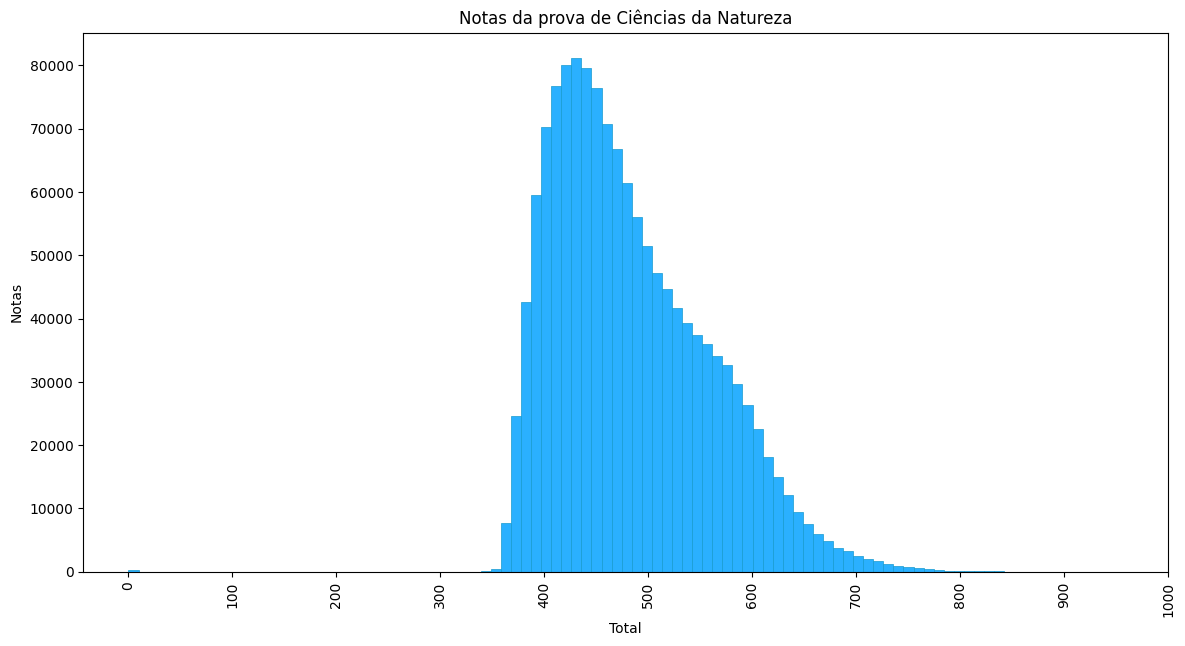

In [33]:
%matplotlib inline
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(notas_cn_list, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.xticks(notas_intervalo, notas_intervalo, rotation ='vertical') 
plt.title('Notas da prova de Ciências da Natureza') 
plt.xlabel('Total') 
plt.ylabel('Notas')
plt.savefig("notas_cn.png")
plt.show()


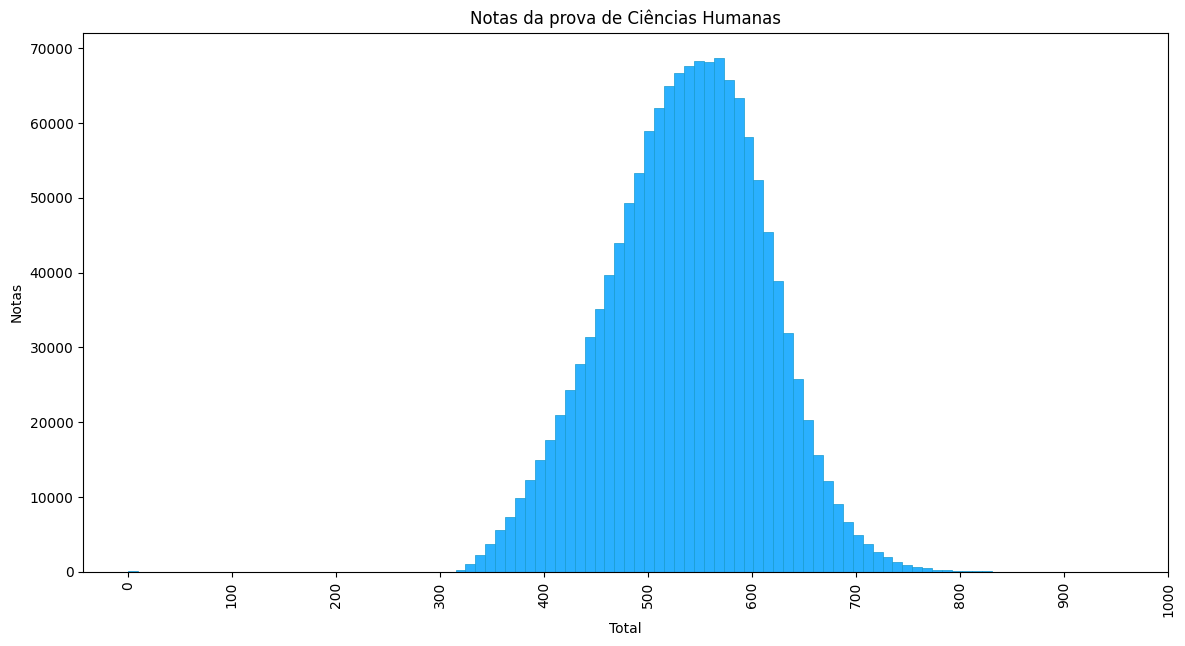

In [34]:
%matplotlib inline
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(notas_ch_list, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.xticks(notas_intervalo, notas_intervalo, rotation ='vertical') 
plt.title('Notas da prova de Ciências Humanas') 
plt.xlabel('Total') 
plt.ylabel('Notas')
plt.savefig("notas_ch.png")
plt.show()

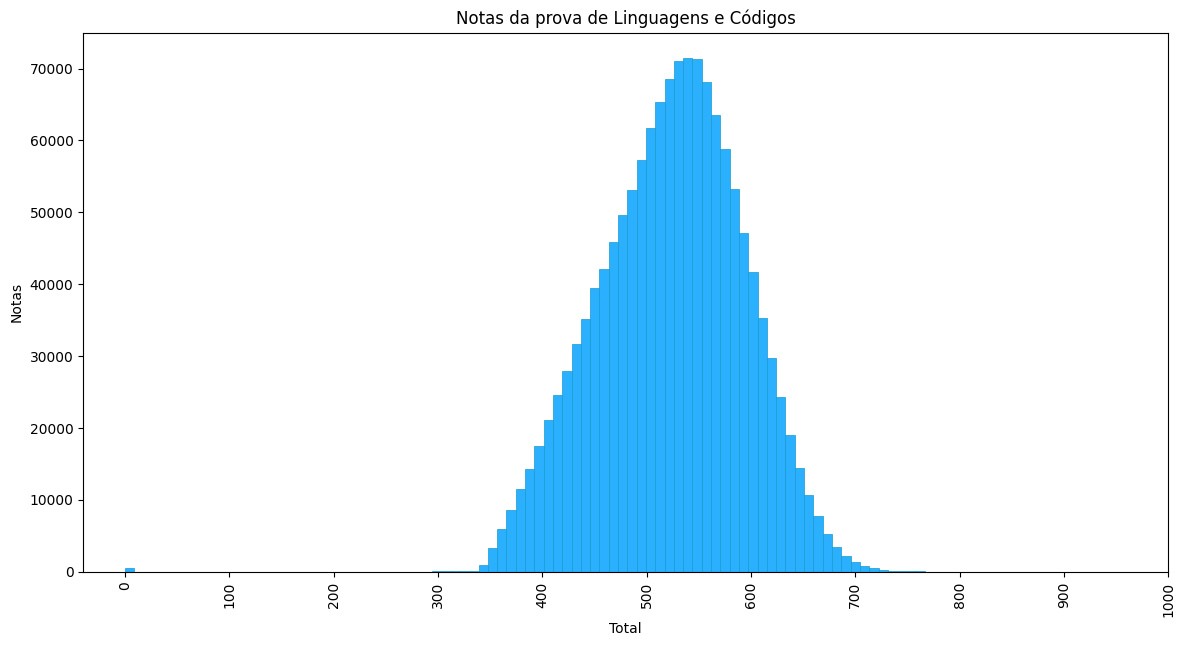

In [35]:
%matplotlib inline
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(notas_lc_list, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.xticks(notas_intervalo, notas_intervalo, rotation ='vertical') 
plt.title('Notas da prova de Linguagens e Códigos') 
plt.xlabel('Total') 
plt.ylabel('Notas')
plt.savefig("notas_lc.png")
plt.show()


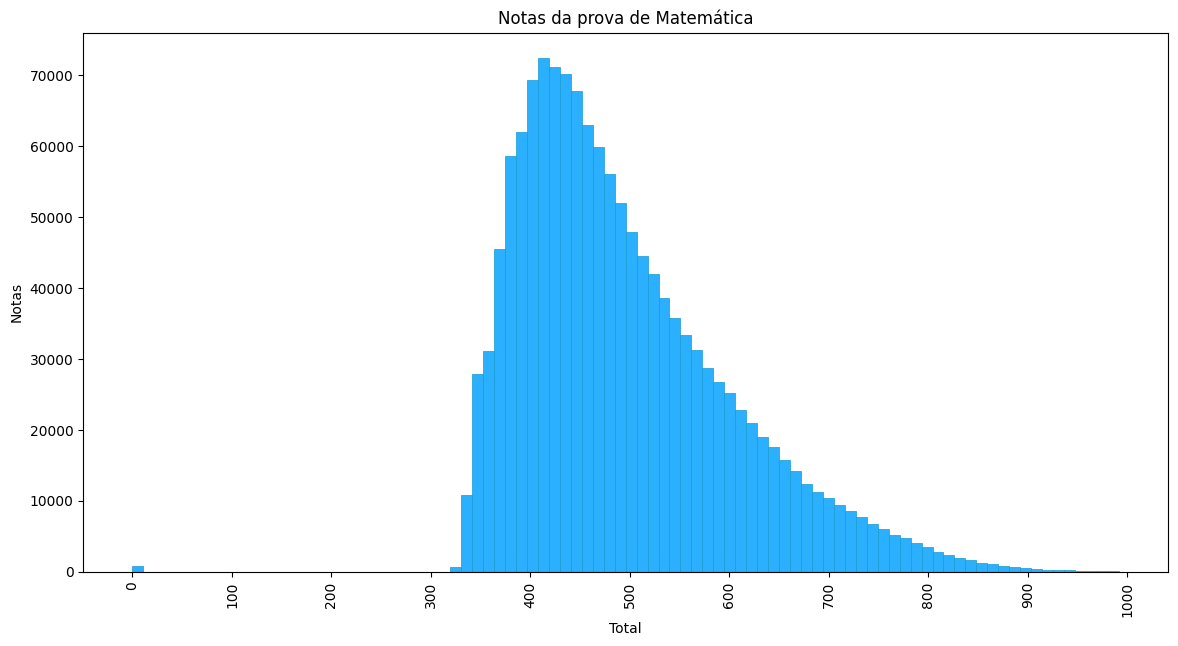

In [36]:
%matplotlib inline
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(notas_mt_list, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.xticks(notas_intervalo, notas_intervalo, rotation ='vertical') 
plt.title('Notas da prova de Matemática') 
plt.xlabel('Total') 
plt.ylabel('Notas') 
plt.savefig("notas_mt.png")
plt.show()


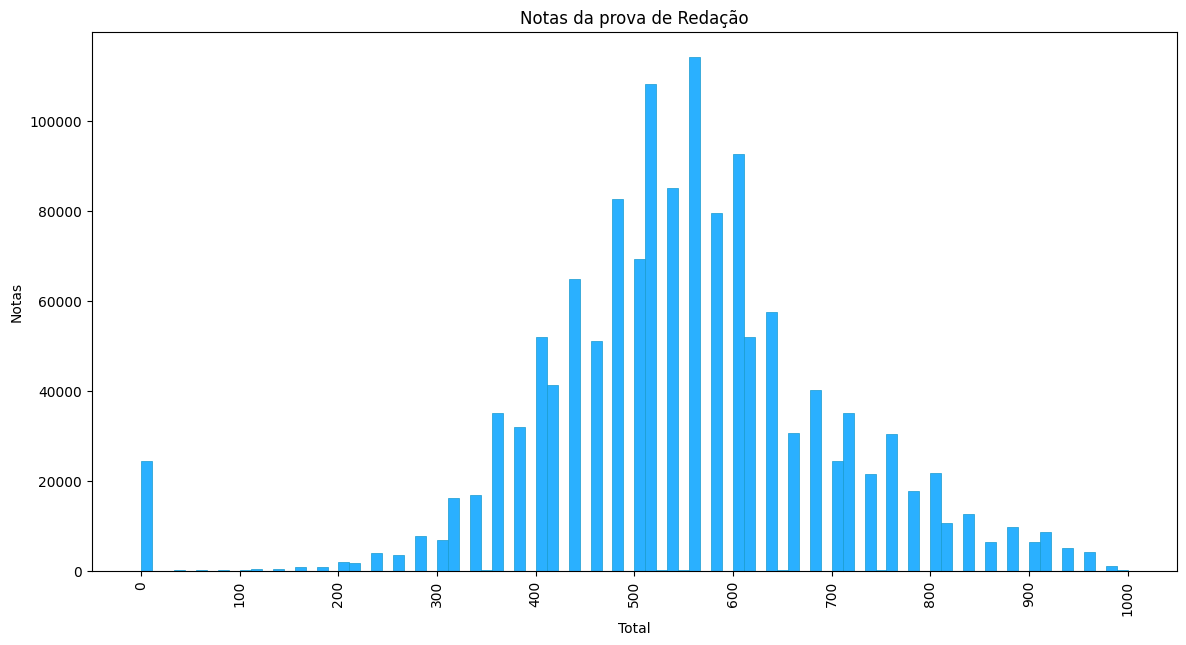

In [37]:
%matplotlib inline
plt.figure(figsize=(14,7)) # Make it 14x7 inch
plt.hist(notas_red_list, bins=90, facecolor = '#2ab0ff', edgecolor='#169acf', linewidth=0.5)
plt.xticks(notas_intervalo, notas_intervalo, rotation ='vertical') 
plt.title('Notas da prova de Redação') 
plt.xlabel('Total') 
plt.ylabel('Notas') 
plt.savefig("notas_red.png")
plt.show()


In [38]:
cols = ['NU_NOTA_CH', 'NU_NOTA_CN', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']
df['NOTAS_STR'] = df[cols].apply(lambda row: '_'.join(row.values.astype(str)), axis=1)

In [39]:
df['NOTAS_STR'].value_counts(ascending = True)

NOTAS_STR
544.2_446.1_500.5_599.3_580.0    1
639.6_551.2_595.6_754.4_600.0    1
578.8_433.9_568.5_439.4_540.0    1
526.5_383.5_562.2_472.0_540.0    1
527.0_564.8_538.6_562.7_640.0    1
                                ..
458.3_428.0_450.9_387.5_560.0    1
476.9_392.6_437.9_435.5_380.0    1
419.0_406.7_547.0_493.6_600.0    1
631.3_537.4_567.1_520.0_500.0    1
545.2_495.6_529.3_397.4_740.0    1
Name: count, Length: 1388044, dtype: int64

In [40]:
f_qte = [v_total, v_f1, v_f2, v_f3, v_f4, v_f5, v_f6, v_f7, v_f8]
f_perc = [v_total/v_total, v_f1/v_total, v_f2/v_total, v_f3/v_total, v_f4/v_total, v_f5/v_total, v_f6/v_total, v_f7/v_total, v_f8/v_total]

In [41]:
row_labels = ["Sem filtro", "Filtro 1", "Filtro 2", "Filtro 3", "Filtro 4", "Filtro 5", "Filtro 6", "Filtro 7", "Filtro 8"]

In [42]:
df_filtros = pd.DataFrame({"Quantidade": f_qte,
                "Percentual": f_perc})

In [43]:
df_filtros.index = row_labels
df_filtros_formatted = df_filtros.style.format({'Percentual': "{:,.2%}"})
display(df_filtros_formatted)

,Quantidade,Percentual
Sem filtro,8627367,100.00%
Filtro 1,8627367,100.00%
Filtro 2,6810529,78.94%
Filtro 3,5726620,66.38%
Filtro 4,5725635,66.37%
Filtro 5,5496816,63.71%
Filtro 6,5496816,63.71%
Filtro 7,1652471,19.15%
Filtro 8,1388044,16.09%


In [44]:
df_uf = pd.DataFrame({"UF": df['SG_UF_RESIDENCIA'].value_counts(ascending = False).index,
                      "Quantidade": df['SG_UF_RESIDENCIA'].value_counts(ascending = False).values,
                     "Percentual": df['SG_UF_RESIDENCIA'].value_counts(normalize=True, ascending = False).values*100})
display(df_uf)

,UF,Quantidade,Percentual
0,SP,303127,21.838429
1,MG,131502,9.473907
2,RJ,94992,6.843587
3,CE,88077,6.345404
4,BA,79438,5.723017
5,PR,77315,5.570068
6,RS,65511,4.719663
7,PE,63760,4.593514
8,PA,57917,4.172562
9,SC,51234,3.691093


In [45]:
df_uf["Percentual"] = df_uf["Percentual"].round(2)
df_uf["Percentual"] = df_uf["Percentual"].astype(str) + '%'

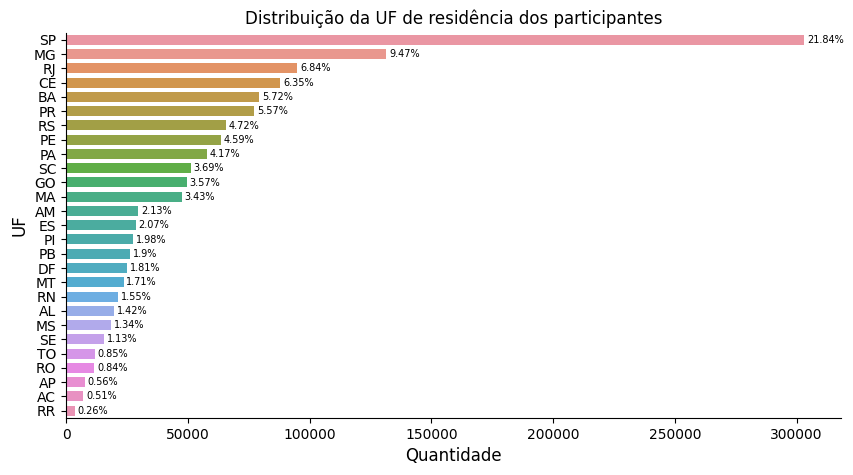

In [46]:
%matplotlib inline
plt.figure(figsize=(10,5))
ax = sns.barplot(data = df_uf, y = "UF", x = "Quantidade", alpha=1, width=0.70, dodge=False)
plt.title('Distribuição da UF de residência dos participantes')
plt.ylabel('UF', fontsize=12)
plt.xlabel('Quantidade', fontsize=12)
for c in ax.containers:
    labels = df_uf["Percentual"]
    ax.bar_label(c, labels, padding=2, fontsize=7)
sns.despine()
plt.savefig("dist_uf.png")
plt.show()

In [143]:
idade = df[["NU_IDADE", "TP_SEXO"]]
idade = idade.dropna()
idade_h = idade[idade['TP_SEXO'] == "M"]
idade_m = idade[idade['TP_SEXO'] == "F"]
idade_h = idade_h['NU_IDADE']
idade_m = idade_m['NU_IDADE']

In [144]:
idade_m_obs = idade_m.value_counts(ascending = False).sort_index()
idade_m = idade_m.to_numpy()
idade_m_media = np.average(idade_m)
print("A média da idade do sexo feminino é: ", idade_m_media)
idade_m_dp = np.std(idade_m)
print("O desvio padrão da idade do sexo feminino é: ",idade_m_dp)

A média da idade do sexo feminino é:  17.694372727882655
O desvio padrão da idade do sexo feminino é:  1.9602113393410412


In [145]:
idade_h_obs = idade_h.value_counts(ascending = False).sort_index()
idade_h = idade_h.to_numpy()
idade_h_media = np.average(idade_h)
print("A média da idade do sexo masculino é: ", idade_h_media)
idade_h_dp = np.std(idade_h)
print("O desvio padrão da idade do sexo masculino é: ",idade_h_dp)

A média da idade do sexo masculino é:  17.76591756767185
O desvio padrão da idade do sexo masculino é:  1.640336669789637


In [148]:
df_idade = pd.DataFrame({"Média": [idade_m_media, idade_h_media],
                "Desvio padrão": [idade_m_dp, idade_h_dp]})
df_idade.index = ["Feminino", "Masculino"]
display(df_idade)

,Média,Desvio padrão
Feminino,17.694373,1.960211
Masculino,17.765918,1.640337


In [149]:
df_m_idade = pd.DataFrame({"Idade (Fem.)": idade_m_obs.index,
                "Quantidade de observações": idade_m_obs.values})
print(df_m_idade.to_string())

    Idade (Fem.)  Quantidade de observações
0             10                          1
1             11                          2
2             12                          1
3             13                         10
4             14                         72
5             15                       1167
6             16                      38701
7             17                     433208
8             18                     232831
9             19                      59021
10            20                      18149
11            21                       6756
12            22                       3306
13            23                       1971
14            24                       1340
15            25                        986
16            26                        807
17            27                        674
18            28                        631
19            29                        549
20            30                        507
21            31                

In [150]:
df_h_idade = pd.DataFrame({"Idade (Masc.)": idade_h_obs.index,
                "Quantidade de observações": idade_h_obs.values})
print(df_h_idade.to_string())

    Idade (Masc.)  Quantidade de observações
0              13                          3
1              14                         47
2              15                        603
3              16                      21303
4              17                     287349
5              18                     181008
6              19                      56438
7              20                      19405
8              21                       7164
9              22                       3246
10             23                       1721
11             24                       1060
12             25                        675
13             26                        528
14             27                        355
15             28                        318
16             29                        277
17             30                        175
18             31                        187
19             32                        141
20             33                        123
21        

In [166]:
raca = df[["TP_COR_RACA", "TP_SEXO"]]
raca = raca.dropna()
raca_h = raca[raca['TP_SEXO'] == "M"]
raca_m = raca[raca['TP_SEXO'] == "F"]
raca_h = raca_h['TP_COR_RACA']
raca_m = raca_m['TP_COR_RACA']

In [167]:
raca_h_obs = raca_h.value_counts().sort_index()
raca_m_obs = raca_m.value_counts().sort_index()

In [168]:
raca_h_decl = 0
for x in range (1, 6):
    raca_h_decl = raca_h_decl + raca_h_obs[x]
raca_h_ndecl = raca_h_obs[0] + raca_h_obs[6]
raca_h_total = len(raca_h)

In [169]:
raca_m_decl = 0
for x in range (1, 6):
    raca_m_decl = raca_m_decl + raca_m_obs[x]
raca_m_ndecl = raca_m_obs[0] + raca_m_obs[6]
raca_m_total = len(raca_m)

In [172]:
df_raca = pd.DataFrame({"Perc. feminino": [raca_m_decl/raca_m_total, raca_m_ndecl/raca_m_total],
                "Perc. masculino": [raca_h_decl/raca_h_total, raca_h_ndecl/raca_h_total]})
df_raca.index = ["Raça declarada", "Sem resposta"]
df_raca_formatted = df_raca.style.format({'Perc. feminino': "{:,.2%}",
                                          'Perc. masculino': "{:,.2%}"})
display(df_raca_formatted)

,Perc. feminino,Perc. masculino
Raça declarada,98.56%,98.17%
Sem resposta,1.44%,1.83%


In [175]:
pai = df[["Q001", "TP_SEXO"]]
pai = pai.dropna()
pai_h = pai[pai['TP_SEXO'] == "M"]
pai_m = pai[pai['TP_SEXO'] == "F"]
pai_h = pai_h['Q001']
pai_m = pai_m['Q001']

In [176]:
pai_m_total = len(pai_m)
pai_m_obs = pai_m.value_counts().sort_index()
pai_m_sem_em_total = pai_m_obs["A"] + pai_m_obs["B"] + pai_m_obs["C"] + pai_m_obs["D"] + pai_m_obs["H"]
pai_m_em_total = pai_m_obs["E"] + pai_m_obs["F"] + pai_m_obs["G"]

In [177]:
pai_h_total = len(pai_h)
pai_h_obs = pai_h.value_counts().sort_index()
pai_h_sem_em_total = pai_h_obs["A"] + pai_h_obs["B"] + pai_h_obs["C"] + pai_h_obs["D"] + pai_h_obs["H"]
pai_h_em_total = pai_h_obs["E"] + pai_h_obs["F"] + pai_h_obs["G"]

In [178]:
df_pai_em = pd.DataFrame({"Perc. feminino": [pai_m_sem_em_total/pai_m_total, pai_m_em_total/pai_m_total],
                "Perc. masculino": [pai_h_sem_em_total/pai_h_total, pai_h_em_total/pai_h_total]})
df_pai_em.index = ["Sem ensino médio completo", "Com ensino médio completo"]
df_pai_formatted = df_pai_em.style.format({'Perc. feminino': "{:,.2%}",
                                          'Perc. masculino': "{:,.2%}"})
display(df_pai_formatted)


,Perc. feminino,Perc. masculino
Sem ensino médio completo,60.99%,55.28%
Com ensino médio completo,39.01%,44.72%


In [182]:
mae = df[["Q002", "TP_SEXO"]]
mae = mae.dropna()
mae_h = mae[mae['TP_SEXO'] == "M"]
mae_m = mae[mae['TP_SEXO'] == "F"]
mae_h = mae_h['Q002']
mae_m = mae_m['Q002']

In [183]:
mae_m_total = len(mae_m)
mae_m_obs = mae_m.value_counts().sort_index()
mae_m_sem_em_total = mae_m_obs["A"] + mae_m_obs["B"] + mae_m_obs["C"] + mae_m_obs["D"] + mae_m_obs["H"]
mae_m_em_total = mae_m_obs["E"] + mae_m_obs["F"] + mae_m_obs["G"]

In [184]:
mae_h_total = len(mae_h)
mae_h_obs = mae_h.value_counts().sort_index()
mae_h_sem_em_total = mae_h_obs["A"] + mae_h_obs["B"] + mae_h_obs["C"] + mae_h_obs["D"] + mae_h_obs["H"]
mae_h_em_total = mae_h_obs["E"] + mae_h_obs["F"] + mae_h_obs["G"]

In [186]:
df_mae_em = pd.DataFrame({"Perc. feminino": [mae_m_sem_em_total/mae_m_total, mae_m_em_total/mae_m_total],
                "Perc. masculino": [mae_h_sem_em_total/mae_h_total, mae_h_em_total/mae_h_total]})
df_mae_em.index = ["Sem ensino médio completo", "Com ensino médio completo"]
df_mae_formatted = df_mae_em.style.format({'Perc. feminino': "{:,.2%}",
                                          'Perc. masculino': "{:,.2%}"})
display(df_mae_formatted)

,Perc. feminino,Perc. masculino
Sem ensino médio completo,49.74%,44.31%
Com ensino médio completo,50.26%,55.69%


In [187]:
dep_adm = df[["TP_DEPENDENCIA_ADM_ESC", "TP_SEXO"]]
dep_adm = dep_adm.dropna()
dep_adm_h = dep_adm[dep_adm['TP_SEXO'] == "M"]
dep_adm_m = dep_adm[dep_adm['TP_SEXO'] == "F"]
dep_adm_h = dep_adm_h['TP_DEPENDENCIA_ADM_ESC']
dep_adm_m = dep_adm_m['TP_DEPENDENCIA_ADM_ESC']

In [188]:
dep_adm_h_total = len(dep_adm_h)
dep_adm_h_obs = dep_adm_h.value_counts().sort_index()
dep_fed_h = dep_adm_h_obs[1]
dep_est_h = dep_adm_h_obs[2]
dep_mun_h = dep_adm_h_obs[3]
dep_priv_h = dep_adm_h_obs[4]

In [189]:
dep_adm_m_total = len(dep_adm_m)
dep_adm_m_obs = dep_adm_m.value_counts().sort_index()
dep_fed_m = dep_adm_m_obs[1]
dep_est_m = dep_adm_m_obs[2]
dep_mun_m = dep_adm_m_obs[3]
dep_priv_m = dep_adm_m_obs[4]

In [190]:
df_dep_adm = pd.DataFrame({"Perc. feminino": [dep_fed_m/dep_adm_m_total, dep_est_m/dep_adm_m_total, dep_mun_m/dep_adm_m_total, dep_priv_m/dep_adm_m_total],
                "Perc. masculino": [dep_fed_h/dep_adm_h_total, dep_est_h/dep_adm_h_total, dep_mun_h/dep_adm_h_total, dep_priv_h/dep_adm_h_total]})
df_dep_adm.index = ["Federal", "Estadual", "Municipal", "Privada"]
df_dep_adm_formatted = df_dep_adm.style.format({'Perc. feminino': "{:,.2%}",
                                                'Perc. masculino': "{:,.2%}"})
display(df_dep_adm_formatted)

,Perc. feminino,Perc. masculino
Federal,2.21%,2.99%
Estadual,77.33%,73.80%
Municipal,0.92%,0.88%
Privada,19.53%,22.32%


In [192]:
nch = df[["NU_NOTA_CH", "TP_SEXO"]]
nch = nch.dropna()
nch_h = nch[nch['TP_SEXO'] == "M"]
nch_m = nch[nch['TP_SEXO'] == "F"]
nch_h = nch_h['NU_NOTA_CH']
nch_m = nch_m['NU_NOTA_CH']

In [193]:
nch_m_obs = nch_m.value_counts(ascending = False).sort_index()
nch_m = nch_m.to_numpy()
nch_m_media = np.average(nch_m)
print("A média da nota de Ciências Humanas do sexo feminino é: ", nch_m_media)
nch_m_dp = np.std(nch_m)
print("O desvio padrão da nota de Ciências Humanas do sexo feminino é: ", nch_m_dp)

A média da nota de Ciências Humanas do sexo feminino é:  532.11523
O desvio padrão da nota de Ciências Humanas do sexo feminino é:  72.75374


In [194]:
nch_h_obs = nch_h.value_counts(ascending = False).sort_index()
nch_h = nch_h.to_numpy()
nch_h_media = np.average(nch_h)
print("A média da nota de Ciências Humanas do sexo masculino é: ", nch_h_media)
nch_h_dp = np.std(nch_h)
print("O desvio padrão da nota de Ciências Humanas do sexo masculino é: ", nch_h_dp)

A média da nota de Ciências Humanas do sexo feminino é:  544.0065
O desvio padrão da nota de Ciências Humanas do sexo feminino é:  76.722786


In [224]:
df_nch = pd.DataFrame({"Média": [nch_m_media, nch_h_media],
                "Desvio padrão": [nch_m_dp, nch_h_dp]})
df_nch.index = ["Feminino", "Masculino"]
display(df_nch)

,Média,Desvio padrão
Feminino,532.115234,72.753738
Masculino,544.006470,76.722786


In [254]:
df_nch_h = pd.DataFrame({"Nota (Masc.)": nch_h_obs.index,
                "Quantidade de observações": nch_h_obs.values})
print(df_nch_h.to_string())

      Nota (Masc.)  Quantidade de observações
0         0.000000                         36
1       319.899994                          7
2       320.000000                          2
3       320.100006                          1
4       320.299988                          1
5       320.399994                          1
6       320.500000                          2
7       320.700012                          1
8       320.799988                          1
9       320.899994                          2
10      321.100006                          2
11      321.200012                          3
12      321.299988                          2
13      321.399994                          1
14      321.500000                          1
15      321.600006                          2
16      321.799988                          1
17      321.899994                          3
18      322.000000                          2
19      322.100006                          1
20      322.200012                

In [255]:
df_nch_m = pd.DataFrame({"Nota (Fem.)": nch_m_obs.index,
                "Quantidade de observações": nch_m_obs.values})
print(df_nch_m.to_string())

      Nota (Fem.)  Quantidade de observações
0        0.000000                         52
1      319.899994                         10
2      320.000000                          2
3      320.100006                          2
4      320.200012                          2
5      320.299988                          2
6      320.399994                          1
7      320.500000                          3
8      320.600006                          1
9      320.700012                          2
10     320.799988                          1
11     320.899994                          1
12     321.100006                          4
13     321.200012                          1
14     321.299988                          1
15     321.399994                          2
16     321.500000                          3
17     321.600006                          2
18     321.700012                          2
19     321.799988                          5
20     322.000000                          6
21     322

In [204]:
ncn = df[["NU_NOTA_CN", "TP_SEXO"]]
ncn = ncn.dropna()
ncn_h = ncn[ncn['TP_SEXO'] == "M"]
ncn_m = ncn[ncn['TP_SEXO'] == "F"]
ncn_h = ncn_h['NU_NOTA_CN']
ncn_m = ncn_m['NU_NOTA_CN']

In [205]:
ncn_m_obs = ncn_m.value_counts(ascending = False).sort_index()
ncn_m = ncn_m.to_numpy()
ncn_m_media = np.average(ncn_m)
print("A média da nota de Ciências da Natureza do sexo feminino é: ", ncn_m_media)
ncn_m_dp = np.std(ncn_m)
print("O desvio padrão da nota de Ciências da Natureza do sexo feminino é: ", ncn_m_dp)

A média da nota de Ciências da Natureza do sexo feminino é:  474.43542
O desvio padrão da nota de Ciências da Natureza do sexo feminino é:  71.179276


In [206]:
ncn_h_obs = ncn_h.value_counts(ascending = False).sort_index()
ncn_h = ncn_h.to_numpy()
ncn_h_media = np.average(ncn_h)
print("A média da nota de Ciências da Natureza do sexo masculino é: ", ncn_h_media)
ncn_h_dp = np.std(ncn_h)
print("O desvio padrão da nota de Ciências da Natureza do sexo masculino é: ", ncn_h_dp)

A média da nota de Ciências da Natureza do sexo masculino é:  495.01755
O desvio padrão da nota de Ciências da Natureza do sexo masculino é:  78.94365


In [221]:
df_ncn = pd.DataFrame({"Média": [ncn_m_media, ncn_h_media],
                "Desvio padrão": [ncn_m_dp, ncn_h_dp]})
df_ncn.index = ["Feminino", "Masculino"]
display(df_ncn)

,Média,Desvio padrão
Feminino,474.435425,71.179276
Masculino,495.017548,78.943649


In [256]:
df_ncn_h = pd.DataFrame({"Nota (Masc.)": ncn_h_obs.index,
                "Quantidade de observações": ncn_h_obs.values})
print(df_ncn_h.to_string())

      Nota (Masc.)  Quantidade de observações
0         0.000000                        138
1       342.700012                          1
2       343.299988                          1
3       343.500000                          1
4       344.600006                          1
5       344.799988                          1
6       345.100006                          1
7       345.500000                          1
8       346.100006                          1
9       346.299988                          1
10      346.399994                          1
11      346.700012                          1
12      346.799988                          1
13      347.399994                          1
14      347.500000                          1
15      347.600006                          2
16      347.799988                          3
17      347.899994                          1
18      348.000000                          2
19      348.100006                          1
20      348.399994                

In [257]:
df_ncn_m = pd.DataFrame({"Nota (Fem.)": ncn_m_obs.index,
                "Quantidade de observações": ncn_m_obs.values})
print(df_ncn_m.to_string())

      Nota (Fem.)  Quantidade de observações
0        0.000000                        138
1      341.399994                          1
2      342.500000                          1
3      342.799988                          1
4      342.899994                          1
5      343.200012                          2
6      343.299988                          1
7      343.399994                          1
8      343.799988                          1
9      344.100006                          1
10     344.299988                          2
11     344.399994                          1
12     344.500000                          1
13     344.799988                          2
14     344.899994                          1
15     345.000000                          2
16     345.100006                          1
17     345.299988                          2
18     345.700012                          1
19     346.000000                          1
20     346.100006                          1
21     346

In [217]:
nlc = df[["NU_NOTA_LC", "TP_SEXO"]]
nlc = nlc.dropna()
nlc_h = nlc[nlc['TP_SEXO'] == "M"]
nlc_m = nlc[nlc['TP_SEXO'] == "F"]
nlc_h = nlc_h['NU_NOTA_LC']
nlc_m = nlc_m['NU_NOTA_LC']

In [218]:
nlc_m_obs = nlc_m.value_counts(ascending = False).sort_index()
nlc_m = nlc_m.to_numpy()
nlc_m_media = np.average(nlc_m)
print("A média da nota de Linguagens e Códigos do sexo feminino é: ", nlc_m_media)
nlc_m_dp = np.std(nlc_m)
print("O desvio padrão da nota de Linguagens e Códigos do sexo feminino é: ", nlc_m_dp)

A média da nota de Linguagens e Códigos do sexo feminino é:  522.25446
O desvio padrão da nota de Linguagens e Códigos do sexo feminino é:  68.01161


In [219]:
nlc_h_obs = nlc_h.value_counts(ascending = False).sort_index()
nlc_h = nlc_h.to_numpy()
nlc_h_media = np.average(nlc_h)
print("A média da nota de Linguagens e Códigos do sexo masculino é: ", nlc_h_media)
nlc_h_dp = np.std(nlc_h)
print("O desvio padrão da nota de Linguagens e Códigos do sexo masculino é: ", nlc_h_dp)

A média da nota de Linguagens e Códigos do sexo masculino é:  524.27856
O desvio padrão da nota de Linguagens e Códigos do sexo masculino é:  71.02446


In [223]:
df_nlc = pd.DataFrame({"Média": [nlc_m_media, nlc_h_media],
                "Desvio padrão": [nlc_m_dp, nlc_h_dp]})
df_nlc.index = ["Feminino", "Masculino"]
display(df_nlc)

,Média,Desvio padrão
Feminino,522.254456,68.011612
Masculino,524.278564,71.024460


In [258]:
df_nlc_h = pd.DataFrame({"Nota (Masc.)": nlc_h_obs.index,
                "Quantidade de observações": nlc_h_obs.values})
print(df_nlc_h.to_string())

      Nota (Masc.)  Quantidade de observações
0         0.000000                        284
1       291.399994                          1
2       291.700012                          1
3       291.799988                          1
4       293.100006                          1
5       294.000000                          1
6       294.700012                          1
7       296.000000                          2
8       297.200012                          1
9       298.399994                          1
10      298.500000                          1
11      299.200012                          1
12      299.399994                          1
13      301.100006                          1
14      301.200012                          2
15      301.399994                          1
16      301.500000                          1
17      302.100006                          1
18      302.299988                          2
19      302.700012                          1
20      302.899994                

In [259]:
df_nlc_m = pd.DataFrame({"Nota (Fem.)": nlc_m_obs.index,
                "Quantidade de observações": nlc_m_obs.values})
print(df_nlc_m.to_string())

      Nota (Fem.)  Quantidade de observações
0        0.000000                        272
1      292.100006                          1
2      292.200012                          1
3      292.600006                          1
4      293.000000                          1
5      293.399994                          1
6      294.299988                          1
7      295.399994                          1
8      296.399994                          1
9      297.200012                          1
10     298.100006                          1
11     298.299988                          1
12     298.500000                          1
13     298.700012                          1
14     299.200012                          1
15     300.100006                          1
16     300.600006                          1
17     302.299988                          1
18     302.399994                          1
19     302.500000                          2
20     303.100006                          1
21     303

In [239]:
nmt = df[["NU_NOTA_MT", "TP_SEXO"]]
nmt = nmt.dropna()
nmt_h = nmt[nmt['TP_SEXO'] == "M"]
nmt_m = nmt[nmt['TP_SEXO'] == "F"]
nmt_h = nmt_h['NU_NOTA_MT']
nmt_m = nmt_m['NU_NOTA_MT']

In [240]:
nmt_m_obs = nmt_m.value_counts(ascending = False).sort_index()
nmt_m = nmt_m.to_numpy()
nmt_m_media = np.average(nmt_m)
print("A média da nota de Matemática do sexo feminino é: ", nmt_m_media)
nmt_m_dp = np.std(nmt_m)
print("O desvio padrão da nota de Matemática do sexo feminino é: ", nmt_m_dp)

A média da nota de Matemática do sexo feminino é:  476.82217
O desvio padrão da nota de Matemática do sexo feminino é:  96.85551


In [241]:
nmt_h_obs = nmt_h.value_counts(ascending = False).sort_index()
nmt_h = nmt_h.to_numpy()
nmt_h_media = np.average(nmt_h)
print("A média da nota de Matemática do sexo masculino é: ", nmt_h_media)
nmt_h_dp = np.std(nmt_h)
print("O desvio padrão da nota de Matemática do sexo masculino é: ", nmt_h_dp)

A média da nota de Matemática do sexo masculino é:  518.36487
O desvio padrão da nota de Matemática do sexo masculino é:  115.31631


In [242]:
df_nmt = pd.DataFrame({"Média": [nmt_m_media, nmt_h_media],
                "Desvio padrão": [nmt_m_dp, nmt_h_dp]})
df_nmt.index = ["Feminino", "Masculino"]
display(df_nmt)

,Média,Desvio padrão
Feminino,476.822174,96.855507
Masculino,518.364868,115.316307


In [260]:
df_nmt_h = pd.DataFrame({"Nota (Masc.)": nmt_h_obs.index,
                "Quantidade de observações": nmt_h_obs.values})
print(df_nmt_h.to_string())

      Nota (Masc.)  Quantidade de observações
0         0.000000                        406
1       319.500000                          1
2       319.700012                          3
3       319.799988                          1
4       319.899994                          4
5       320.000000                          2
6       320.100006                          5
7       320.200012                          2
8       320.299988                          1
9       320.399994                          2
10      320.600006                          2
11      320.700012                          1
12      320.799988                          1
13      320.899994                          2
14      321.000000                          1
15      321.100006                          2
16      321.200012                          1
17      321.399994                          2
18      321.500000                          1
19      321.600006                          1
20      321.700012                

In [261]:
df_nmt_m = pd.DataFrame({"Nota (Fem.)": nmt_m_obs.index,
                "Quantidade de observações": nmt_m_obs.values})
print(df_nmt_m.to_string())

      Nota (Fem.)  Quantidade de observações
0        0.000000                        428
1      319.500000                          3
2      319.600006                          3
3      319.700012                          2
4      319.799988                          3
5      319.899994                          3
6      320.000000                          4
7      320.100006                          2
8      320.200012                          6
9      320.299988                          4
10     320.399994                          6
11     320.500000                          9
12     320.600006                          5
13     320.700012                          3
14     320.799988                          4
15     320.899994                          5
16     321.000000                          2
17     321.100006                          4
18     321.200012                          3
19     321.299988                          3
20     321.399994                          3
21     321

In [284]:
nred = df[["NU_NOTA_REDACAO", "TP_SEXO"]]
nred = nred.dropna()
nred_h = nred[nred['TP_SEXO'] == "M"]
nred_m = nred[nred['TP_SEXO'] == "F"]
nred_h = nred_h['NU_NOTA_REDACAO']
nred_m = nred_m['NU_NOTA_REDACAO']

In [285]:
nred_m_obs = nred_m.value_counts(ascending = False).sort_index()
nred_m = nred_m.to_numpy()
nred_m_media = np.average(nred_m)
print("A média da nota de Redação do sexo feminino é: ", nred_m_media)
nred_m_dp = np.std(nred_m)
print("O desvio padrão da nota de Redação do sexo feminino é: ", nred_m_dp)

A média da nota de Redação do sexo feminino é:  559.51935
O desvio padrão da nota de Redação do sexo feminino é:  150.14685


In [286]:
nred_h_obs = nred_h.value_counts(ascending = False).sort_index()
nred_h = nred_h.to_numpy()
nred_h_media = np.average(nred_h)
print("A média da nota de Redação do sexo feminino é: ", nred_h_media)
nred_h_dp = np.std(nred_h)
print("O desvio padrão da nota de Redação do sexo feminino é: ", nred_h_dp)

A média da nota de Redação do sexo feminino é:  531.95605
O desvio padrão da nota de Redação do sexo feminino é:  155.58112


In [287]:
df_nred = pd.DataFrame({"Média": [nred_m_media, nred_h_media],
                "Desvio padrão": [nred_m_dp, nred_h_dp]})
df_nred.index = ["Feminino", "Masculino"]
display(df_nred)

,Média,Desvio padrão
Feminino,559.519348,150.146851
Masculino,531.956055,155.581116


In [288]:
df_nred_h = pd.DataFrame({"Nota (Masc.)": nred_h_obs.index,
                "Quantidade de observações": nred_h_obs.values})
print(df_nred_h.to_string())

     Nota (Masc.)  Quantidade de observações
0             0.0                      12777
1            40.0                         31
2            60.0                         25
3            67.0                          1
4            80.0                         80
5           100.0                         53
6           101.0                          2
7           120.0                        163
8           126.0                          1
9           134.0                          6
10          140.0                        139
11          151.0                          1
12          159.0                          6
13          160.0                        408
14          180.0                        447
15          184.0                         22
16          200.0                       1096
17          209.0                         11
18          217.0                          1
19          220.0                       1003
20          234.0                         29
21        

In [289]:
df_nred_m = pd.DataFrame({"Nota (Fem.)": nred_m_obs.index,
                "Quantidade de observações": nred_m_obs.values})
print(df_nred_m.to_string())

     Nota (Fem.)  Quantidade de observações
0            0.0                      11504
1           40.0                         18
2           60.0                         26
3           80.0                         63
4          100.0                         46
5          117.0                          1
6          120.0                        131
7          134.0                         10
8          140.0                        136
9          151.0                          1
10         159.0                          7
11         160.0                        302
12         180.0                        329
13         184.0                         24
14         200.0                        819
15         209.0                          9
16         217.0                          2
17         220.0                        753
18         226.0                          1
19         234.0                         25
20         240.0                       1666
21         242.0                

[Text(0.5, 0, 'Nota redação (Masc.)'), Text(0, 0.5, 'Densidade')]

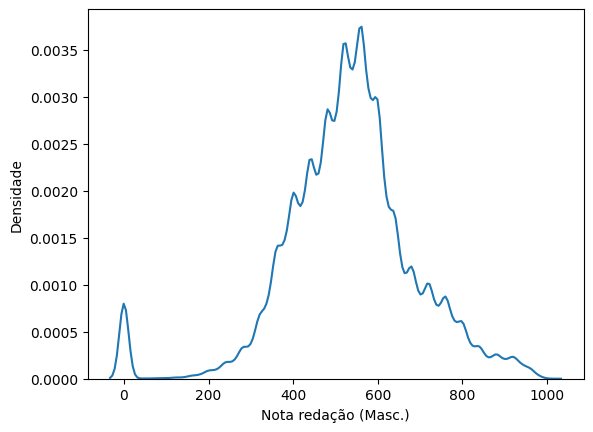

In [293]:
ax = sns.kdeplot(data= nred_h)
ax.set(xlabel='Nota Redação (Masc.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota redação (Fem.)'), Text(0, 0.5, 'Densidade')]

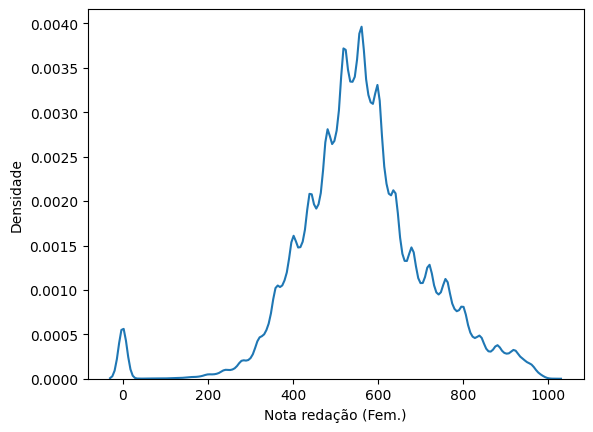

In [294]:
ax = sns.kdeplot(data= nred_m)
ax.set(xlabel='Nota Redação (Fem.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Ciências Humanas (Masc.)'), Text(0, 0.5, 'Densidade')]

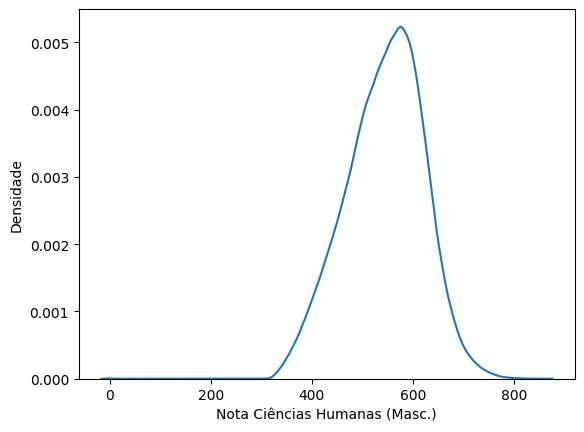

In [295]:
ax = sns.kdeplot(data= nch_h)
ax.set(xlabel='Nota Ciências Humanas (Masc.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Ciências Humanas (Fem.)'), Text(0, 0.5, 'Densidade')]

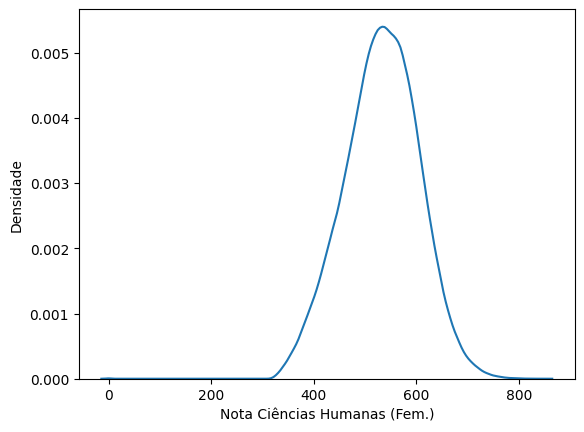

In [297]:
ax = sns.kdeplot(data= nch_m)
ax.set(xlabel='Nota Ciências Humanas (Fem.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Ciências da Natureza (Masc.)'), Text(0, 0.5, 'Densidade')]

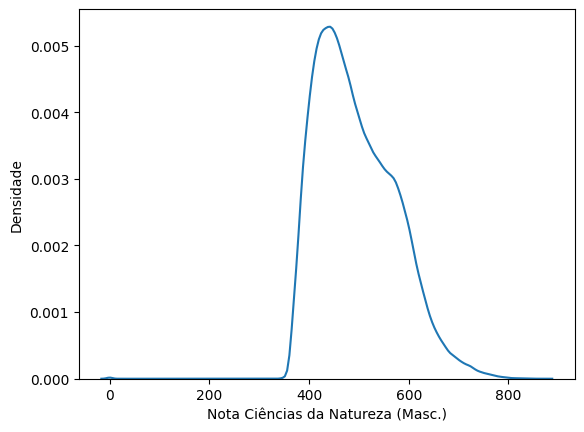

In [298]:
ax = sns.kdeplot(data= ncn_h)
ax.set(xlabel='Nota Ciências da Natureza (Masc.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Ciências da Natureza (Fem.)'), Text(0, 0.5, 'Densidade')]

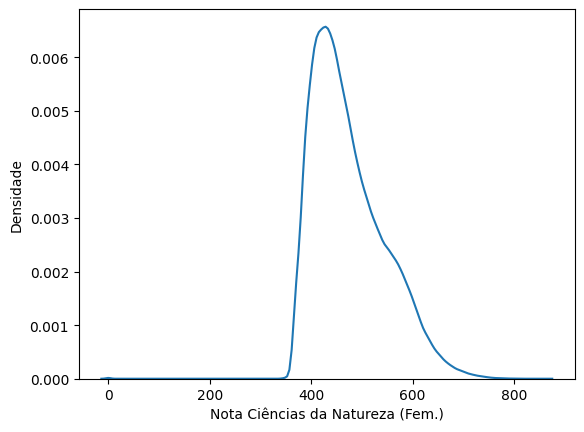

In [299]:
ax = sns.kdeplot(data= ncn_m)
ax.set(xlabel='Nota Ciências da Natureza (Fem.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Linguagens e Códigos (Masc.)'), Text(0, 0.5, 'Densidade')]

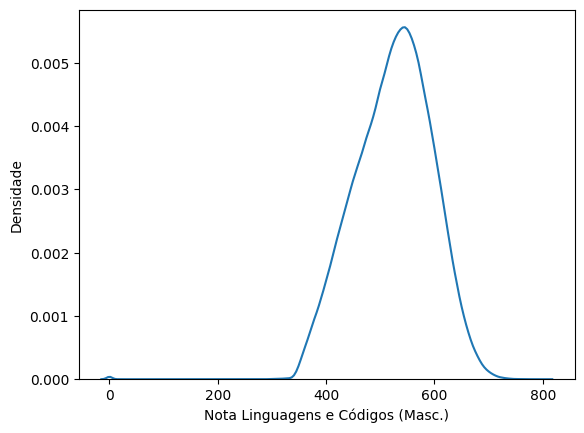

In [300]:
ax = sns.kdeplot(data= nlc_h)
ax.set(xlabel='Nota Linguagens e Códigos (Masc.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Linguagens e Códigos (Fem.)'), Text(0, 0.5, 'Densidade')]

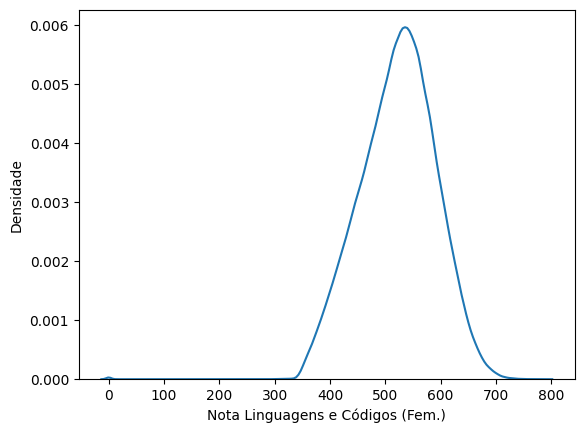

In [301]:
ax = sns.kdeplot(data= nlc_m)
ax.set(xlabel='Nota Linguagens e Códigos (Fem.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Matemática (Masc.)'), Text(0, 0.5, 'Densidade')]

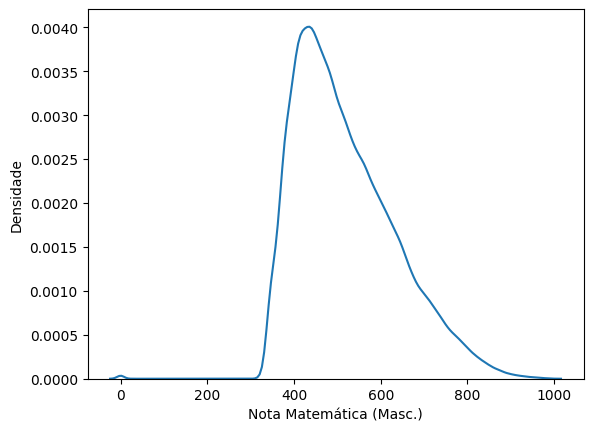

In [302]:
ax = sns.kdeplot(data= nmt_h)
ax.set(xlabel='Nota Matemática (Masc.)', ylabel='Densidade')

[Text(0.5, 0, 'Nota Matemática (Fem.)'), Text(0, 0.5, 'Densidade')]

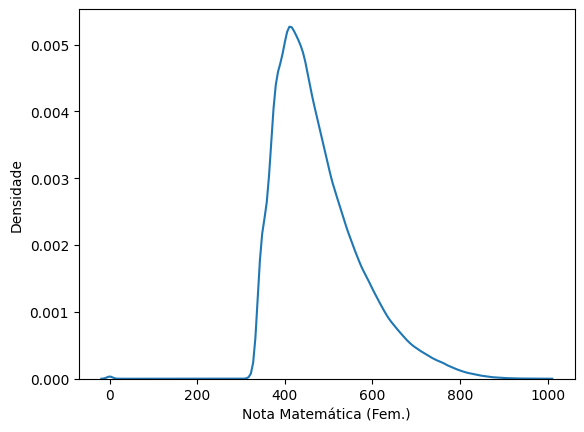

In [303]:
ax = sns.kdeplot(data= nmt_m)
ax.set(xlabel='Nota Matemática (Fem.)', ylabel='Densidade')